# 데이터 불러오기

In [1]:
! pip3 install koreanize_matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 49.5 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

In [3]:
application_path = "/content/drive/MyDrive/코드잇_데이터분석_6기/프로젝트/데이터 분석 중급 프로젝트_1/원본 데이터/주제 1. 국내 채용시장 및 채용 플랫폼 이용패턴 분석/Application.csv"
company_path = "/content/drive/MyDrive/코드잇_데이터분석_6기/프로젝트/데이터 분석 중급 프로젝트_1/원본 데이터/주제 1. 국내 채용시장 및 채용 플랫폼 이용패턴 분석/Company.csv"
company_fund_path = "/content/drive/MyDrive/코드잇_데이터분석_6기/프로젝트/데이터 분석 중급 프로젝트_1/원본 데이터/주제 1. 국내 채용시장 및 채용 플랫폼 이용패턴 분석/CompanyFund.csv"
job_path = "/content/drive/MyDrive/코드잇_데이터분석_6기/프로젝트/데이터 분석 중급 프로젝트_1/원본 데이터/주제 1. 국내 채용시장 및 채용 플랫폼 이용패턴 분석/Job.csv"

In [4]:
application_df = pd.read_csv(application_path)
application_df.head(2)

,Unnamed: 0,cdate,company_uuid,job_uuid,user_uuid,application_uuid
0,0,2017-02-25 23:45:01,de4b3596-b4ab-47cd-b8ea-6f9e14170064,459e461d-a571-4ed3-8751-8f4cb5b9ff37,b0329bd7-fc45-4e83-993a-b73bd9d3549c,59c42363-f764-4cbd-aafd-20eb663ea5d7
1,1,2020-11-23 14:46:07.329731,f6156b12-d4d7-469f-84be-31799c765211,e5ed4f4a-08aa-4f2d-9042-1e9bbd36803f,b0329bd7-fc45-4e83-993a-b73bd9d3549c,425db0e8-87f8-4b4d-8248-7f24c31d49d3


In [5]:
company_df = pd.read_csv(company_path)
company_df.head(2)

,Unnamed: 0,cdate,mdate,found_date,employee_count,view_count,follow_count,reference_count,company_uuid
0,0,2022-06-09 04:08:40,2022-06-09 04:08:40,NaN,0명,0,0,0,c46f2fa5-f940-40fb-bd4a-aa0ff7a837fd
1,1,2017-05-22 10:57:12,2022-07-25 00:12:02,NaN,0명,256,0,0,725e87bb-de2f-416a-a6b8-1ca8d0d096e0


In [6]:
company_fund_df = pd.read_csv(company_fund_path)
company_fund_df.head(2)

,Unnamed: 0,fund_date,round_type,raised,currency,company_uuid
0,0,2015-01-15,Seed,0,KRW,2bf21122-15b6-4e6e-ae32-6e25968246f6
1,1,2016-05-31,Seed,0,KRW,2bf21122-15b6-4e6e-ae32-6e25968246f6


In [7]:
job_df = pd.read_csv(job_path)
job_df.head(2)

,Unnamed: 0,cdate,mdate,job_field,career_type_string,start_date,end_date,allow_remote,can_show_salary,job_uuid,company_uuid
0,0,2020-11-25 10:32:10,2020-11-25 10:32:10,SW 개발,"신입,경력,인턴",NaN,2020-11-25,1,0,764292b0-53f8-4f14-ac83-6eafc7a6a18d,daa34559-fc42-47f6-b5c6-cc6171404f37
1,1,2020-12-03 16:24:16,2020-12-03 16:24:16,HW 개발,인턴,2020-12-03,2020-12-04,1,0,b2b598d6-9ca3-4eb4-ac9c-bb57a6dad2ad,daa34559-fc42-47f6-b5c6-cc6171404f37


# 기업 활동성 기반

## 1. 투자받은 회사 vs 채용 활발도

In [14]:
# 투자 유무 붙이기
funded_companies = company_fund_df["company_uuid"].unique()
job_df["funded"] = job_df["company_uuid"].isin(funded_companies)

# 채용공고 수 비교
job_df.groupby("funded").size()

,0
funded,
False,72359
True,71888


## 2. 기업 view_count, follow_count vs 실제 지원 수

In [15]:
# 지원 데이터에 회사 정보 포함하도록 병합
app_jobs = pd.merge(application_df[["job_uuid"]], job_df[["job_uuid", "company_uuid"]], on="job_uuid", how="left")

# 기업별 지원 수 집계
company_app_counts = app_jobs.groupby("company_uuid").size().reset_index(name="application_count")

# 기업 인기지표와 병합
company_stats = company_df[["company_uuid", "view_count", "follow_count"]].merge(company_app_counts, on="company_uuid", how="left").fillna(0)

# 상관관계 확인
company_stats[["view_count", "follow_count", "application_count"]].corr()

,view_count,follow_count,application_count
view_count,1.000000,0.580719,0.504366
follow_count,0.580719,1.000000,0.960341
application_count,0.504366,0.960341,1.000000


## 3. 인지도 높은 회사의 지원율

In [16]:
# 공고 수 집계
company_job_counts = job_df.groupby("company_uuid").size().reset_index(name="job_count")

# 위에서 구한 company_app_counts와 병합
company_stats = company_job_counts.merge(company_app_counts, on="company_uuid", how="left").fillna(0)
company_stats["support_rate"] = company_stats["application_count"] / company_stats["job_count"]

# 회사 인기도와 병합
company_stats = company_stats.merge(company_df[["company_uuid", "view_count", "follow_count"]], on="company_uuid", how="left")

# 인기도 vs 지원율 상관관계
company_stats[["support_rate", "view_count", "follow_count"]].corr()

,support_rate,view_count,follow_count
support_rate,1.000000,0.103205,0.323634
view_count,0.103205,1.000000,0.562041
follow_count,0.323634,0.562041,1.000000


## 4. 시각화

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


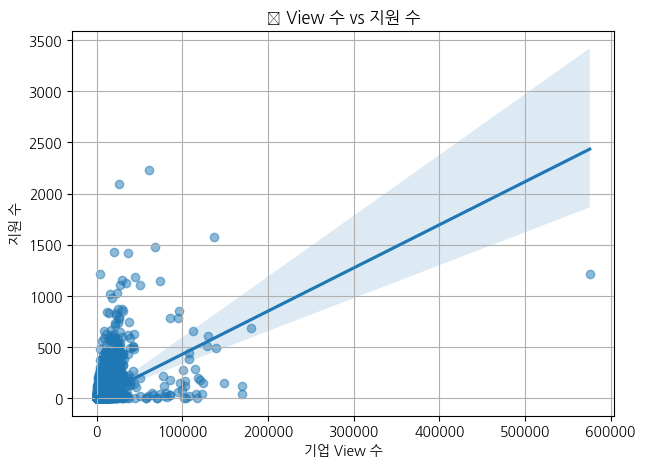

In [17]:
# 산점도: view_count vs application_count
plt.figure(figsize=(7, 5))
sns.regplot(data=company_stats, x="view_count", y="application_count", scatter_kws={"alpha":0.5})
plt.title("📌 View 수 vs 지원 수")
plt.xlabel("기업 View 수")
plt.ylabel("지원 수")
plt.grid(True)
plt.show()

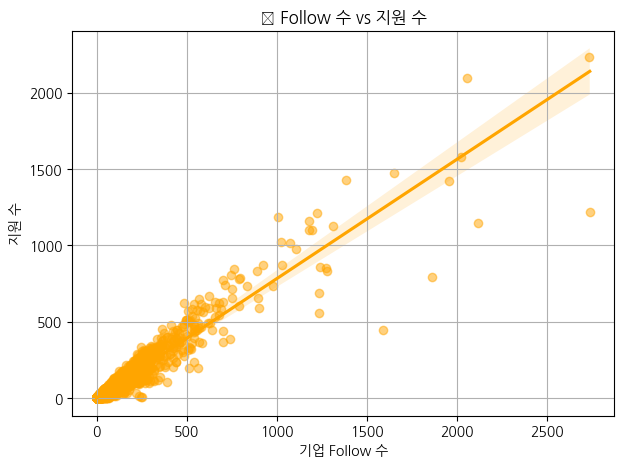

In [18]:
# 산점도: follow_count vs application_count
plt.figure(figsize=(7, 5))
sns.regplot(data=company_stats, x="follow_count", y="application_count", scatter_kws={"alpha":0.5}, color="orange")
plt.title("📌 Follow 수 vs 지원 수")
plt.xlabel("기업 Follow 수")
plt.ylabel("지원 수")
plt.grid(True)
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


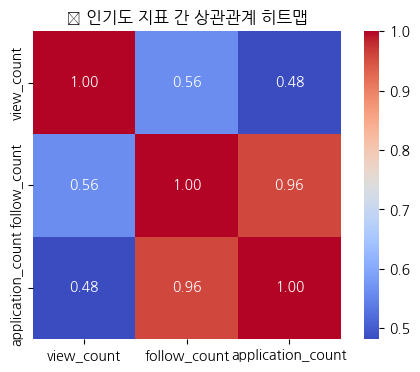

In [19]:
# 히트맵: 상관관계 시각화
plt.figure(figsize=(6, 4))
sns.heatmap(company_stats[["view_count", "follow_count", "application_count"]].corr(),
            annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("📊 인기도 지표 간 상관관계 히트맵")
plt.show()